Load the one-hot encoding and the mix  
Create a model that takes the mix as input and outputs the one-hot encoding  
Train the model  
Save the model  
Load the model  
Test the model  
Save the test results  
Load the test results  
Plot  

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Example encoding of a label [1, 1, 0, 1, 0, 0]

slakh_mapping_labels = {
    "Bass": "bass",
    "Chromatic Percussion": "drums",
    "Drums": "drums",
    "Percussive": "drums",
    "Guitar": "guitar",
    "Piano": "piano",
    "Organ": "other",
    "Strings": "other",
    "Strings (continued)": "other",
    "Brass": "other",
    "Reed": "other",
    "Pipe": "other",
    "Synth Lead": "other",
    "Synth Pad": "other",
    "Sound Effects": "other",
    "Ethnic": "other",
    "Sound effects": "other",
}

def map_slakh_labels(label):
    return slakh_mapping_labels[label]

def label_to_index(label):
    return label_names.index(label)

label_names = ["vocal", "guitar", "bass", "drums", "piano","other"]
n_labels = len(label_names)


In [ ]:
# Load labels from a CSV file
labels_df = pd.read_csv('path/to/your/labels.csv')

# Example structure of labels_df
# | png_path         | label       |
# |------------------|-------------|
# | dir/file1.wav    | [1,0,0,1,0] |
# | dir/file2.wav    | [0,0,0,1,0] |

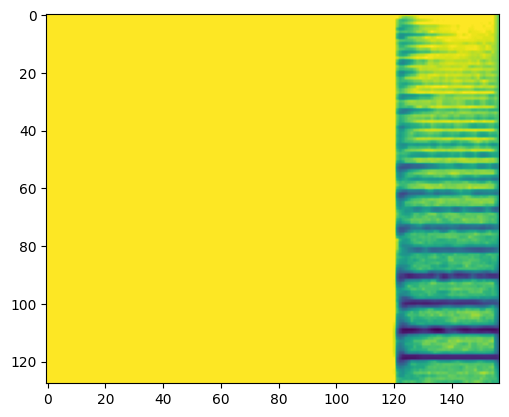

[array('[0. 0. 0. 0. 0. 1.]', dtype='<U19')]
(1, 128, 157, 1)
(1,)


In [5]:
from skimage import io


# Function to load an audio file and convert it to a spectrogram
def load_spectogram_file(file_path):
    # Load specrogram png image using skimage
    spectrogram = io.imread(file_path, as_gray=True)
    return spectrogram


# Load labels from a CSV file
labels_df = pd.read_csv('datasets/custom/data.csv')

# Directory containing spectogram files
spectrogram_dir = 'datasets/custom/'

# Initialize lists to hold data and labels
data = []
labels = []

# Iterate over each row in the labels DataFrame
for index, row in labels_df.iterrows():
    spectrogram = load_spectogram_file(row['png_path'])
    data.append(spectrogram)
    labels.append(np.array(row['label']))

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Reshape data to add a channel dimension
data = data[..., np.newaxis] # TODO WHY?

# Example shapes
print(data.shape)  # (num_samples, height, width, 1)
print(labels.shape)  # (num_samples, num_classes)
